# 중간에 test, train dataset (validation 말고) 나누는 것은 엑셀을 건들였음. 구글링 하기 귀찮아서 그냥 엑셀 건듦 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from sklearn.model_selection import train_test_split 

# feature engineering

열병합 한 상태로 진행

In [2]:
from os.path import join
df = pd.read_excel('rain_data.xlsx')
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006,7,10,8,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006,7,10,9,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006,7,10,10,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006,7,10,11,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006,7,10,12,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


# 연,월,일,시간 을 datetime format 으로 변경

## 시간 의 경우, datetime 에서 24 를 인식하지 못한다. 비슷한 맥락이므로 -1 을 진행하여 붙힌다

In [3]:
df['시간'] = df['시간']-1
df.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006,7,10,7,189.100000,6.4,7,7,7,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006,7,10,8,216.951962,6.3,7,8,7,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006,7,10,9,251.424419,6.4,7,9,7,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006,7,10,10,302.812199,7.3,7,10,7,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006,7,10,11,384.783406,8.2,7,12,8,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


## 연 월 일 시간 을 datetime 으로 한번에 붙힌다. 

### dateInt 잘 들어갔는지 확인

In [4]:
df['dateInt']= df['연'].astype(str) + df['월'].astype(str).str.zfill(2)+df['일'].astype(str).str.zfill(2)+df['시간'].astype(str).str.zfill(2)
df['dateInt']

0       2006071007
1       2006071008
2       2006071009
3       2006071010
4       2006071011
           ...    
3046    2018070716
3047    2018070717
3048    2018070718
3049    2018070719
3050    2018070720
Name: dateInt, Length: 3051, dtype: object

### dateInt 를 datetime format 으로 변경하여 Date 라는 칼럼에 저장

In [5]:
df['Date'] = pd.to_datetime(df['dateInt'], format="%Y%m%d%H")
df['Date']

0      2006-07-10 07:00:00
1      2006-07-10 08:00:00
2      2006-07-10 09:00:00
3      2006-07-10 10:00:00
4      2006-07-10 11:00:00
               ...        
3046   2018-07-07 16:00:00
3047   2018-07-07 17:00:00
3048   2018-07-07 18:00:00
3049   2018-07-07 19:00:00
3050   2018-07-07 20:00:00
Name: Date, Length: 3051, dtype: datetime64[ns]

### Date 칼럼이 제일 뒤로 갔으므로 앞으로 당겨서 사용할 것임. insert 사용

In [6]:
df.insert(4, 'date', value = df['Date'])
df.head()

,홍수사상번호,연,월,일,date,시간,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,...,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,dateInt,Date
0,1,2006,7,10,2006-07-10 07:00:00,7,189.100000,6.4,7,7,...,122.660,6.4,7,7,8,8,2.54,122.610,2006071007,2006-07-10 07:00:00
1,1,2006,7,10,2006-07-10 08:00:00,8,216.951962,6.3,7,8,...,122.648,7.3,7,8,10,10,2.53,122.600,2006071008,2006-07-10 08:00:00
2,1,2006,7,10,2006-07-10 09:00:00,9,251.424419,6.4,7,9,...,122.636,8.2,7,9,10,11,2.53,122.590,2006071009,2006-07-10 09:00:00
3,1,2006,7,10,2006-07-10 10:00:00,10,302.812199,7.3,7,10,...,122.620,11.3,9,10,15,14,2.53,122.585,2006071010,2006-07-10 10:00:00
4,1,2006,7,10,2006-07-10 11:00:00,11,384.783406,8.2,7,12,...,122.604,14.4,12,12,18,16,2.53,122.575,2006071011,2006-07-10 11:00:00


### date 라는 칼럼 하나만 사용할 예정이기에, 연,월,일,시간,dateInt, Date 를 drop

In [7]:
df =df.drop(['연','월','일','시간','dateInt','Date'], axis = 1)
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 38,Unnamed: 39,Unnamed: 40,데이터 집단 6,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47
0,1,2006-07-10 07:00:00,189.100000,6.4,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4,7,7,8,8,2.54,122.610
1,1,2006-07-10 08:00:00,216.951962,6.3,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3,7,8,10,10,2.53,122.600
2,1,2006-07-10 09:00:00,251.424419,6.4,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2,7,9,10,11,2.53,122.590
3,1,2006-07-10 10:00:00,302.812199,7.3,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3,9,10,15,14,2.53,122.585
4,1,2006-07-10 11:00:00,384.783406,8.2,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4,12,12,18,16,2.53,122.575


# date, 홍수 사상번호 두개 다 index 로 사용해야될 것 같다고 생각. 나중에 시도해 볼것

### date 를 index 로 사용  
#### 해 봤는데, date 로 진행하게 되면 얘가 그래프를 그릴때도, 비어있는 데이터에 대해서 (1,2,3,4,5, 9,10,11,12 월 ) 는 값이 없어서 아예 평균을 내는 현상을 발견함. 
- index 는 date 로 하면 안되는 거 같음. 
- 아... date 데이터 한번 사용해보고 싶었는데... 좀만 더 생각을 해보자. 

In [8]:
# df = df.set_index('date')
# df.head()

# 데이터 집단 1-6 안에 있는 a-e 데이터를 아예 평균을 내서 새로운 feature 로 저장

In [9]:
df['avg_A_waterfall']  = (df['Unnamed: 7']  + df['Unnamed: 14'] +df['Unnamed: 21'] +df['Unnamed: 28'] +df['Unnamed: 35'] +df['Unnamed: 42'])/6
df['avg_B_waterfall']  = (df['Unnamed: 8']  + df['Unnamed: 15'] +df['Unnamed: 22'] +df['Unnamed: 29'] +df['Unnamed: 36'] +df['Unnamed: 43'])/6
df['avg_C_waterfall']  = (df['Unnamed: 9']  + df['Unnamed: 16'] +df['Unnamed: 23'] +df['Unnamed: 30'] +df['Unnamed: 37'] +df['Unnamed: 44'])/6
# df['avg_D_waterfall']  = (df['Unnamed: 10'] + df['Unnamed: 17'] +df['Unnamed: 24'] +df['Unnamed: 31'] +df['Unnamed: 38'] +df['Unnamed: 45'])/6
df['avg_D_waterlevel'] = (df['Unnamed: 11'] + df['Unnamed: 18'] +df['Unnamed: 25'] +df['Unnamed: 32'] +df['Unnamed: 39'] +df['Unnamed: 46'])/6
df['avg_E_waterlevel'] = (df['Unnamed: 12'] + df['Unnamed: 19'] +df['Unnamed: 26'] +df['Unnamed: 33'] +df['Unnamed: 40'] +df['Unnamed: 47'])/6
df['avg_datagroup'] = (df['데이터집단 1'] + df['데이터집단 2'] +df['데이터집단 3'] +df['데이터 집단 4'] +df['데이터 집단 5'] +df['데이터 집단 6'])/6
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,189.100000,6.4,7,7,7,8,2.54,122.56875,...,8,8,2.54,122.610,7.000000,7.0,7.500000,2.54,122.600903,6.366667
1,1,2006-07-10 08:00:00,216.951962,6.3,7,8,7,8,2.53,122.56250,...,10,10,2.53,122.600,7.000000,8.0,8.500000,2.53,122.597782,6.833333
2,1,2006-07-10 09:00:00,251.424419,6.4,7,9,7,8,2.53,122.55625,...,10,11,2.53,122.590,7.000000,9.0,8.666667,2.53,122.594661,7.600000
3,1,2006-07-10 10:00:00,302.812199,7.3,7,10,7,8,2.53,122.55625,...,15,14,2.53,122.585,8.000000,10.0,11.666667,2.53,122.592748,9.600000
4,1,2006-07-10 11:00:00,384.783406,8.2,7,12,8,10,2.53,122.55625,...,18,16,2.53,122.575,10.166667,12.0,13.666667,2.53,122.587423,12.333333


# scaling 진행 할 것-----> feature engineering 좀만 더 하다가 사용해보자. 

In [10]:
feature_list = ['유입량','데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel','avg_datagroup']

In [11]:
for sth in feature_list:
    norm_inflow = (df[sth]-df[sth].min())/(df[sth].max()-df[sth].min())
    df[sth]=norm_inflow
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874


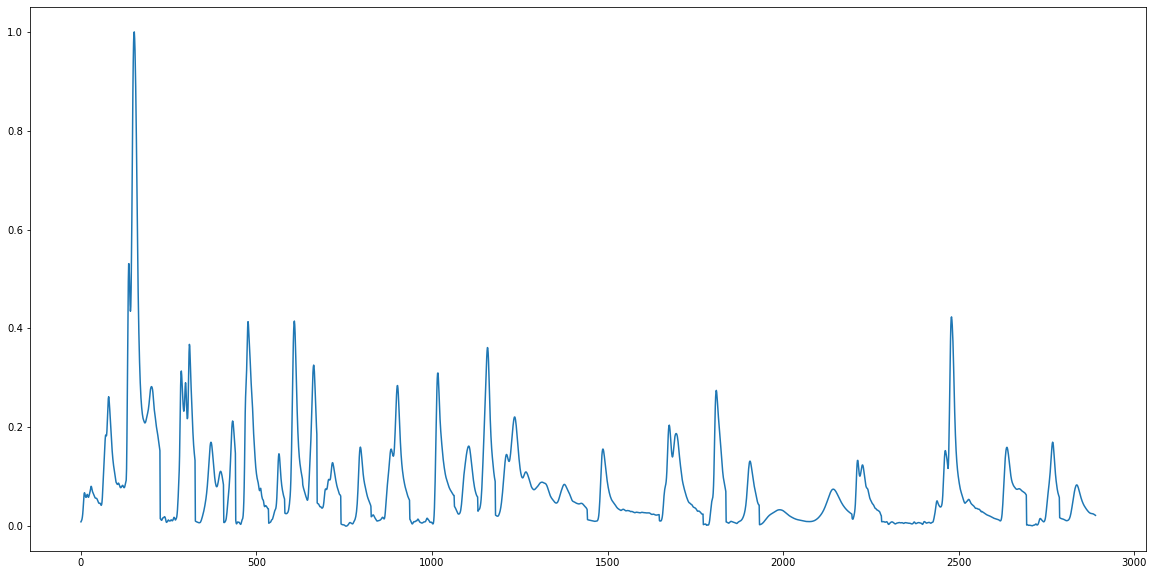

In [12]:
plt.figure(figsize = (20,10))
plt.plot(df['유입량'])

# 만들어 놓은 데이터를 새로운 엑셀 파일로 저장

In [16]:
df.to_excel(excel_writer='0820_0000_datetime_rain_data.xlsx')
df.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874


# index 설정을 안해서 그런가... 이상하게 값이 저장된다... 맨 앞에 있는 0123456789 가 계속해서 생성된다 저장을 할때마다. 

일단은 저장을 할때 첫 row 는 삭제 하는 식으로 진행하자. 

# train, test dataset 서로 다른 엑셀 파일에 저장하는 것 성공

## 아니 근데 왜 저장을 할때 마다 새로운 인덱스 column 이 생성되는지 모르겠다. 

### train dataset 에는 1~25 까지의 데이터가 존재 하고 
### test dataset 에는 26 만 데이터가 존재 하는 상황이다. 

# train data 안에 있을 index는 0-2890 총 2891 개 

In [17]:
df_train = df
df_train = df_train.iloc[:2891]
df_train

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017-07-18 17:00:00,0.023712,0.069378,0.018237,0.000000,0.003953,0.003817,0.125240,0.733069,...,0.004049,0.003831,0.125240,0.732075,0.017893,0.000000,0.004027,0.125240,0.732884,0.024778
2887,25,2017-07-18 18:00:00,0.023223,0.025148,0.006079,0.000000,0.003953,0.003817,0.123323,0.733565,...,0.004049,0.003831,0.123323,0.732671,0.005964,0.000000,0.004027,0.123323,0.733290,0.012444
2888,25,2017-07-18 19:00:00,0.022716,0.012512,0.003040,0.000000,0.003953,0.003817,0.122045,0.733813,...,0.004049,0.003831,0.122045,0.733069,0.002982,0.000000,0.004027,0.122045,0.733622,0.009199
2889,25,2017-07-18 20:00:00,0.022211,0.010309,0.003040,0.000000,0.003953,0.003817,0.120767,0.734061,...,0.004049,0.003831,0.120767,0.733466,0.002982,0.000000,0.004027,0.120767,0.734009,0.008329


# train_dataset 저장하기

In [18]:
df_train.to_excel(excel_writer='0820_0000_train.xlsx')
df_train

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017-07-18 17:00:00,0.023712,0.069378,0.018237,0.000000,0.003953,0.003817,0.125240,0.733069,...,0.004049,0.003831,0.125240,0.732075,0.017893,0.000000,0.004027,0.125240,0.732884,0.024778
2887,25,2017-07-18 18:00:00,0.023223,0.025148,0.006079,0.000000,0.003953,0.003817,0.123323,0.733565,...,0.004049,0.003831,0.123323,0.732671,0.005964,0.000000,0.004027,0.123323,0.733290,0.012444
2888,25,2017-07-18 19:00:00,0.022716,0.012512,0.003040,0.000000,0.003953,0.003817,0.122045,0.733813,...,0.004049,0.003831,0.122045,0.733069,0.002982,0.000000,0.004027,0.122045,0.733622,0.009199
2889,25,2017-07-18 20:00:00,0.022211,0.010309,0.003040,0.000000,0.003953,0.003817,0.120767,0.734061,...,0.004049,0.003831,0.120767,0.733466,0.002982,0.000000,0.004027,0.120767,0.734009,0.008329


# test dataset 만들고 저장하기

In [19]:
df_test = df
df_test = df_test.iloc[2891:]
df_test.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
2891,26,2018-07-01 05:00:00,NaN,0.043415,0.097264,0.000000,0.000000,0.000000,0.054952,0.071198,...,0.004049,0.000000,0.054952,0.072095,0.095427,0.000000,0.002013,0.054952,0.071580,0.023579
2892,26,2018-07-01 06:00:00,NaN,0.033391,0.060790,0.002725,0.000000,0.000000,0.054952,0.070950,...,0.056680,0.030651,0.054952,0.071897,0.061133,0.002780,0.028188,0.054952,0.071455,0.022799
2893,26,2018-07-01 07:00:00,NaN,0.024191,0.033435,0.013624,0.000000,0.000000,0.054313,0.070702,...,0.076923,0.091954,0.054313,0.071698,0.048708,0.013902,0.038926,0.054313,0.071331,0.032402
2894,26,2018-07-01 08:00:00,NaN,0.024030,0.009119,0.029973,0.000000,0.000000,0.054313,0.070454,...,0.089069,0.126437,0.054313,0.071500,0.041252,0.030584,0.054362,0.054313,0.071206,0.048323
2895,26,2018-07-01 09:00:00,NaN,0.040647,0.012158,0.068120,0.003953,0.030534,0.054313,0.070454,...,0.093117,0.137931,0.054313,0.071301,0.049702,0.069509,0.069128,0.054313,0.071178,0.068672


In [20]:
df_test.to_excel(excel_writer='0819_test.xlsx')
df_test.head()

,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
2891,26,2018-07-01 05:00:00,NaN,0.043415,0.097264,0.000000,0.000000,0.000000,0.054952,0.071198,...,0.004049,0.000000,0.054952,0.072095,0.095427,0.000000,0.002013,0.054952,0.071580,0.023579
2892,26,2018-07-01 06:00:00,NaN,0.033391,0.060790,0.002725,0.000000,0.000000,0.054952,0.070950,...,0.056680,0.030651,0.054952,0.071897,0.061133,0.002780,0.028188,0.054952,0.071455,0.022799
2893,26,2018-07-01 07:00:00,NaN,0.024191,0.033435,0.013624,0.000000,0.000000,0.054313,0.070702,...,0.076923,0.091954,0.054313,0.071698,0.048708,0.013902,0.038926,0.054313,0.071331,0.032402
2894,26,2018-07-01 08:00:00,NaN,0.024030,0.009119,0.029973,0.000000,0.000000,0.054313,0.070454,...,0.089069,0.126437,0.054313,0.071500,0.041252,0.030584,0.054362,0.054313,0.071206,0.048323
2895,26,2018-07-01 09:00:00,NaN,0.040647,0.012158,0.068120,0.003953,0.030534,0.054313,0.070454,...,0.093117,0.137931,0.054313,0.071301,0.049702,0.069509,0.069128,0.054313,0.071178,0.068672


# 현재 데이터의 총 갯수는 2890 이다. feature 는 51 개

In [22]:
df = pd.read_excel('0820_0000_train.xlsx')
df = df.drop(['Unnamed: 0'],axis = 1)
print(df.shape)
df

(2891, 51)


,홍수사상번호,date,유입량,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,1,2006-07-10 07:00:00,0.008630,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,1,2006-07-10 08:00:00,0.009926,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,1,2006-07-10 09:00:00,0.011529,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,1,2006-07-10 10:00:00,0.013919,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,1,2006-07-10 11:00:00,0.017731,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017-07-18 17:00:00,0.023712,0.069378,0.018237,0.000000,0.003953,0.003817,0.125240,0.733069,...,0.004049,0.003831,0.125240,0.732075,0.017893,0.000000,0.004027,0.125240,0.732884,0.024778
2887,25,2017-07-18 18:00:00,0.023223,0.025148,0.006079,0.000000,0.003953,0.003817,0.123323,0.733565,...,0.004049,0.003831,0.123323,0.732671,0.005964,0.000000,0.004027,0.123323,0.733290,0.012444
2888,25,2017-07-18 19:00:00,0.022716,0.012512,0.003040,0.000000,0.003953,0.003817,0.122045,0.733813,...,0.004049,0.003831,0.122045,0.733069,0.002982,0.000000,0.004027,0.122045,0.733622,0.009199
2889,25,2017-07-18 20:00:00,0.022211,0.010309,0.003040,0.000000,0.003953,0.003817,0.120767,0.734061,...,0.004049,0.003831,0.120767,0.733466,0.002982,0.000000,0.004027,0.120767,0.734009,0.008329


# date 를 index 로 사용하고자 한다. 근데 홍수 사상번호도 index 로 사용해야 되는게 아닌가? 하는 불안감이 있긴한다.  multiindex 라는 것이 있다고 한다. 나중에 필요하면 해당 키워드로 찾아 볼 것 

## 아니다 date 로 하면 datetime 기준으로 하기 때문에 비어있는 데이터들에 대해서 자동적으로 채워준다. 이렇게 되면 안되기 때문에 index 로 사용하지 않기로 결정


In [23]:
# df = df.set_index('date')
# df.head()

In [27]:
feature_col = ['데이터집단 1', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','데이터집단 2','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','데이터집단 3','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','데이터 집단 4','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33','데이터 집단 5','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','데이터 집단 6','Unnamed: 42','Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','avg_A_waterfall', 'avg_B_waterfall', 'avg_C_waterfall', 'avg_D_waterlevel', 'avg_E_waterlevel','avg_datagroup']
label_col = ['유입량']

In [28]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [29]:
# 325 는 홍수 번호 23, 24, 25 를 의미. 일단은 여기에 있는 값을 예측하도록 만들어 보자.
# 홍수 번호 22 까지 train set 으로 설정하고, 23,24,25 는 test set 으로 설정!
TEST_SIZE = 325
train = df[:-TEST_SIZE]
test = df[-TEST_SIZE:]

train_feature = train[feature_col]
train_label = train[label_col]

# train_feature 는 일단 홍수 번호 22 까지만 포함하였다. 

In [30]:
print(len(train_feature),len(train_label))

2566 2566


In [31]:
train_feature

,데이터집단 1,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,데이터집단 2,Unnamed: 14,Unnamed: 15,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,avg_A_waterfall,avg_B_waterfall,avg_C_waterfall,avg_D_waterlevel,avg_E_waterlevel,avg_datagroup
0,0.019488,0.021277,0.019074,0.027668,0.030534,0.093930,0.153560,0.019184,0.020772,0.019074,...,0.032389,0.030651,0.093930,0.155313,0.020875,0.019462,0.030201,0.093930,0.155043,0.019538
1,0.019184,0.021277,0.021798,0.027668,0.030534,0.093291,0.153312,0.019488,0.020772,0.021798,...,0.040486,0.038314,0.093291,0.154916,0.020875,0.022243,0.034228,0.093291,0.154919,0.020972
2,0.019488,0.021277,0.024523,0.027668,0.030534,0.093291,0.153064,0.022229,0.020772,0.024523,...,0.040486,0.042146,0.093291,0.154518,0.020875,0.025023,0.034899,0.093291,0.154795,0.023328
3,0.022229,0.021277,0.027248,0.027668,0.030534,0.093291,0.153064,0.024970,0.020772,0.027248,...,0.060729,0.053640,0.093291,0.154320,0.023857,0.027804,0.046980,0.093291,0.154719,0.029474
4,0.024970,0.021277,0.032698,0.031621,0.038168,0.093291,0.153064,0.034409,0.026706,0.032698,...,0.072874,0.061303,0.093291,0.153923,0.030318,0.033364,0.055034,0.093291,0.154507,0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2561,0.097267,0.136778,0.114441,0.035573,0.026718,0.174441,0.654924,0.097140,0.133531,0.114441,...,0.036437,0.019157,0.174441,0.655412,0.134195,0.116775,0.048322,0.174441,0.655578,0.097944
2562,0.097140,0.136778,0.114441,0.035573,0.019084,0.173163,0.654924,0.097140,0.133531,0.114441,...,0.028340,0.019157,0.173163,0.655412,0.134195,0.113994,0.046980,0.173163,0.655628,0.096968
2563,0.097140,0.136778,0.114441,0.035573,0.019084,0.172524,0.654924,0.097140,0.133531,0.114441,...,0.008097,0.019157,0.172524,0.655412,0.134195,0.113068,0.043624,0.172524,0.655678,0.095525
2564,0.097140,0.136778,0.114441,0.035573,0.019084,0.171885,0.654924,0.097140,0.133531,0.114441,...,0.008097,0.019157,0.171885,0.655412,0.134195,0.113068,0.043624,0.171885,0.655728,0.094381


In [32]:
train_label

,유입량
0,0.008630
1,0.009926
2,0.011529
3,0.013919
4,0.017731
...,...
2561,0.032520
2562,0.031548
2563,0.030498
2564,0.029575


# 여기 윗까지 일단 train_label 이랑, train_feature 를 나누는 것에 성공을 하였다. 

In [33]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [34]:
print(len(train_feature), len(train_label))

2546 2546


In [35]:
train_label

array([[0.06010701],
       [0.05826407],
       [0.05869976],
       ...,
       [0.03049788],
       [0.0295746 ],
       [0.02901311]])

In [36]:
train_feature

array([[[0.01948843, 0.0212766 , 0.01907357, ..., 0.09392971,
         0.15504297, 0.019538  ],
        [0.01918392, 0.0212766 , 0.02179837, ..., 0.09329073,
         0.15491893, 0.02097209],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.09329073,
         0.15479488, 0.02332811],
        ...,
        [0.17356882, 0.12462006, 0.16621253, ..., 0.18913738,
         0.15296667, 0.17974722],
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.19744409,
         0.15393783, 0.18276907],
        [0.18087698, 0.13069909, 0.17166213, ..., 0.20127796,
         0.15519928, 0.18492021]],

       [[0.01918392, 0.0212766 , 0.02179837, ..., 0.09329073,
         0.15491893, 0.02097209],
        [0.01948843, 0.0212766 , 0.02452316, ..., 0.09329073,
         0.15479488, 0.02332811],
        [0.02222899, 0.0212766 , 0.02724796, ..., 0.09329073,
         0.15471886, 0.02947425],
        ...,
        [0.1772229 , 0.12462006, 0.16893733, ..., 0.19744409,
         0.15393783, 0.18276907],
        [0.1

# train dataset 과 validation dataset 의 분리 
test size 는 633 이라는 갯수는 23,24,25 홍수 번호를 사용하는 것이다

In [37]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=633)
print("x_train.shape", "x_valid.shape")
print(x_train.shape, x_valid.shape)
print("y_train, y_valid")
print(y_train.shape, y_valid.shape)
#(1981, 20, 48) (850, 20, 48)

test_feature = test[feature_col]
test_label = test[label_col]



# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
print("test_feature.shape, test_label.shape")
print(test_feature.shape, test_label.shape)
# ((180, 20, 4), (180, 1))

x_train.shape x_valid.shape
(1913, 20, 48) (633, 20, 48)
y_train, y_valid
(1913, 1) (633, 1)
test_feature.shape, test_label.shape
(305, 20, 48) (305, 1)


# 아 train_featureshape[1] 이라는게 time step 을 의미하는 것인가? 


In [38]:
print(train_feature.shape[0])
print(train_feature.shape[1])

2546
20


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
import tensorflow as tf
import os
model = Sequential()
model.add(LSTM(20,input_shape=(train_feature.shape[1], train_feature.shape[2]),activation='relu',return_sequences=False))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam', metrics = ['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                5520      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 5,541
Trainable params: 5,541
Non-trainable params: 0
_________________________________________________________________
None


2021-08-20 00:04:55.988869: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
import os
from os.path import join
from tensorflow.keras.optimizers import RMSprop
# opt = RMSprop(lr=0.001)

model.compile(loss='mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join('tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=16,
                    verbose = 1,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])  
# history = model.fit(x_train, y_train, 
#                     epochs=100, 
#                     batch_size=16,
#                     verbose = 1,
#                     validation_data=(x_valid, y_valid)) 

2021-08-20 00:04:56.397714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
120/120 [==============================] - 18s 9ms/step - loss: 0.0152 - val_loss: 0.0045

Epoch 00001: val_loss improved from inf to 0.00453, saving model to tmp_checkpoint.h5
Epoch 2/100
  1/120 [..............................] - ETA: 0s - loss: 0.0044

In [ ]:
model.load_weights(filename)
pred = model.predict(test_feature)

# RMSE 뽑아 내기 

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test_label,pred)**0.5
RMSE

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()